In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [5]:
df.shape

(100, 4)

In [6]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [8]:
df =df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
import matplotlib.pyplot as plt

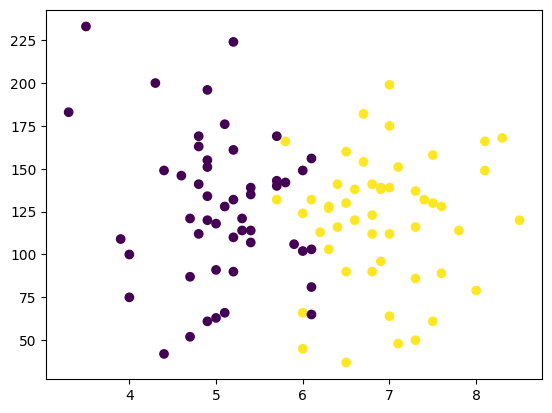

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [14]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [20]:
y_train

4     0
7     0
89    0
2     0
64    1
     ..
17    0
22    0
72    1
78    0
80    0
Name: placement, Length: 90, dtype: int64

In [21]:
x_test

,cgpa,iq
95,4.3,200.0
30,7.6,128.0
21,7.1,151.0
6,5.7,143.0
54,6.4,141.0
69,8.5,120.0
47,5.2,161.0
86,5.1,128.0
42,7.6,89.0
97,6.7,182.0


In [22]:
y_train

4     0
7     0
89    0
2     0
64    1
     ..
17    0
22    0
72    1
78    0
80    0
Name: placement, Length: 90, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
x_train = scaler.fit_transform(x_train)

In [31]:
x_train 

array([[-0.12875117,  0.51778944],
       [-0.84736236, -1.45619603],
       [-0.93718876,  0.74267386],
       [-0.57788316, -0.00694088],
       [ 0.94916561, -1.43120888],
       [-0.93718876,  0.31789217],
       [-0.57788316, -0.18185098],
       [ 0.05090163,  0.69269954],
       [-0.21857757,  0.46781512],
       [-1.83545274, -0.30678677],
       [ 0.05090163, -1.90596487],
       [ 0.67968642,  0.81763533],
       [-0.66770956, -0.28179961],
       [ 1.21864481, -0.8814914 ],
       [-1.38632075,  0.69269954],
       [-0.75753596, -1.38123456],
       [-1.74562635, -0.53167119],
       [-0.66770956,  2.56673638],
       [ 1.937256  ,  0.69269954],
       [-0.48805677, -0.35676109],
       [-1.11684156, -0.00694088],
       [ 0.50003362, -0.78154277],
       [ 1.3982976 ,  0.21794354],
       [ 0.32038082,  0.16796923],
       [ 0.05090163, -1.38123456],
       [ 0.50003362,  0.96755828],
       [-2.19475834,  2.7916208 ],
       [-0.21857757,  1.1924427 ],
       [-1.74562635,

In [32]:
x_test = scaler.fit_transform(x_test)

In [33]:
x_test

array([[-1.68148088,  1.8525442 ],
       [ 0.9359186 , -0.54212694],
       [ 0.53934292,  0.22283745],
       [-0.57106898, -0.04323712],
       [-0.01586303, -0.10975576],
       [ 1.64975483, -0.80820151],
       [-0.96764466,  0.55543067],
       [-1.04695979, -0.54212694],
       [ 0.9359186 , -1.83924047],
       [ 0.22208238,  1.25387641]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf =LogisticRegression()

In [36]:
clf.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred = clf.predict(x_test)

In [38]:
y_test

95    0
30    1
21    1
6     0
54    1
69    1
47    0
86    0
42    1
97    1
Name: placement, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)

0.9

In [45]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

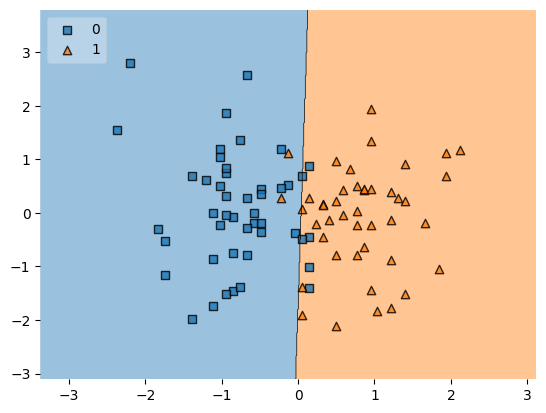

In [47]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)